In [65]:
# import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [42]:
# Load the dataaset with features
df = pd.read_csv("../dataset/processed_data/dataset_with_feature_new.csv")

In [43]:
df.head()

,address,type,length,prefix,checksum,num_alpha,num_digits
0,31tz9NMuii6Efg3SjG1BeFEHUqKCjuwrSk,bitcoin,34,b,base58check,28,6
1,XnNFmrF8xFZwuuR7iNkefB4W8d8QNktqYA,dash,34,d,x11,29,5
2,0x9cc6c2b37428c258a0783d29c3cc05c1cc8348a9,ethereum,42,e,keccak-256,15,27
3,0x139bdf382a423cdec92a8581500993c9cb779889,ethereum,42,e,keccak-256,13,29
4,1N88Ctk7e3taTxjKwzNKTUU1Jc9QJ99q35,bitcoin,34,b,base58check,23,11


In [44]:
# Convert categorical features to numerical values
# df = pd.get_dummies(df, columns=['prefix', 'checksum'])

In [45]:
le = LabelEncoder()

In [46]:
# df['prefix'] = le.fit_transform(df['prefix'])
# df['checksum'] = le.fit_transform(df['checksum'])

In [47]:
df = pd.get_dummies(df, columns=['prefix', 'checksum'])

In [48]:
df.head()

,address,type,length,num_alpha,num_digits,prefix_b,prefix_d,prefix_e,prefix_unknown,checksum_base58check,checksum_keccak-256,checksum_unknown,checksum_x11
0,31tz9NMuii6Efg3SjG1BeFEHUqKCjuwrSk,bitcoin,34,28,6,True,False,False,False,True,False,False,False
1,XnNFmrF8xFZwuuR7iNkefB4W8d8QNktqYA,dash,34,29,5,False,True,False,False,False,False,False,True
2,0x9cc6c2b37428c258a0783d29c3cc05c1cc8348a9,ethereum,42,15,27,False,False,True,False,False,True,False,False
3,0x139bdf382a423cdec92a8581500993c9cb779889,ethereum,42,13,29,False,False,True,False,False,True,False,False
4,1N88Ctk7e3taTxjKwzNKTUU1Jc9QJ99q35,bitcoin,34,23,11,True,False,False,False,True,False,False,False


In [49]:
df.to_csv("trydata.csv", index=False)

In [50]:
df.columns

Index(['address', 'type', 'length', 'num_alpha', 'num_digits', 'prefix_b',
       'prefix_d', 'prefix_e', 'prefix_unknown', 'checksum_base58check',
       'checksum_keccak-256', 'checksum_unknown', 'checksum_x11'],
      dtype='object')

In [51]:
# Label encoding for target
df['type'] = le.fit_transform(df['type'])

In [52]:
# Separate features and target
X = df.drop(columns=['address', 'type'])
y = df['type']

In [53]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [54]:
# Save class information for inference
np.save('../models/classes.npy', le.classes_)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [63]:
# Define models to train
models = {
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=62),
    # "LogisticRegression": LogisticRegression(max_iter=1000, random_state=58),
    "SVC": SVC(random_state=42),
    # "DecisionTree": DecisionTreeClassifier(random_state=23),
    "NaiveBayes": GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

    # Save the model
    joblib.dump(model, f"../models/{model_name}.pkl")
    print(f"{model_name} model saved as {model_name}.pkl\n")

    # Save Random Forest model to a variable for later use
    if model_name == "RandomForest":
        rf_model = model

Training RandomForest...
Results for RandomForest:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20064
           1       1.00      1.00      1.00     20044
           2       1.00      1.00      1.00     19892

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



RandomForest model saved as RandomForest.pkl

Training SVC...
Results for SVC:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20064
           1       1.00      1.00      1.00     20044
           2       1.00      1.00      1.00     19892

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



SVC model saved as SVC.pkl

Training NaiveBayes...
Results for NaiveBayes:
A

In [60]:
# Define the neural network architecture
nn_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/2


/Users/geogotechsolutions/miniconda3/envs/hornetassign/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9347 - loss: 0.1627 - val_accuracy: 1.0000 - val_loss: 5.2151e-08
Epoch 2/2
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9914 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 1.5299e-09


In [58]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report for Neural Network:")
print(classification_report(y_test, y_pred_classes))

# Save the trained neural network model
model.save("../models/neural_network_model.keras")
print("Neural Network model saved as neural_network_model.keras")

Neural Network Test Accuracy: 1.0000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20064
           1       1.00      1.00      1.00     20044
           2       1.00      1.00      1.00     19892

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Neural Network model saved as neural_network_model.keras


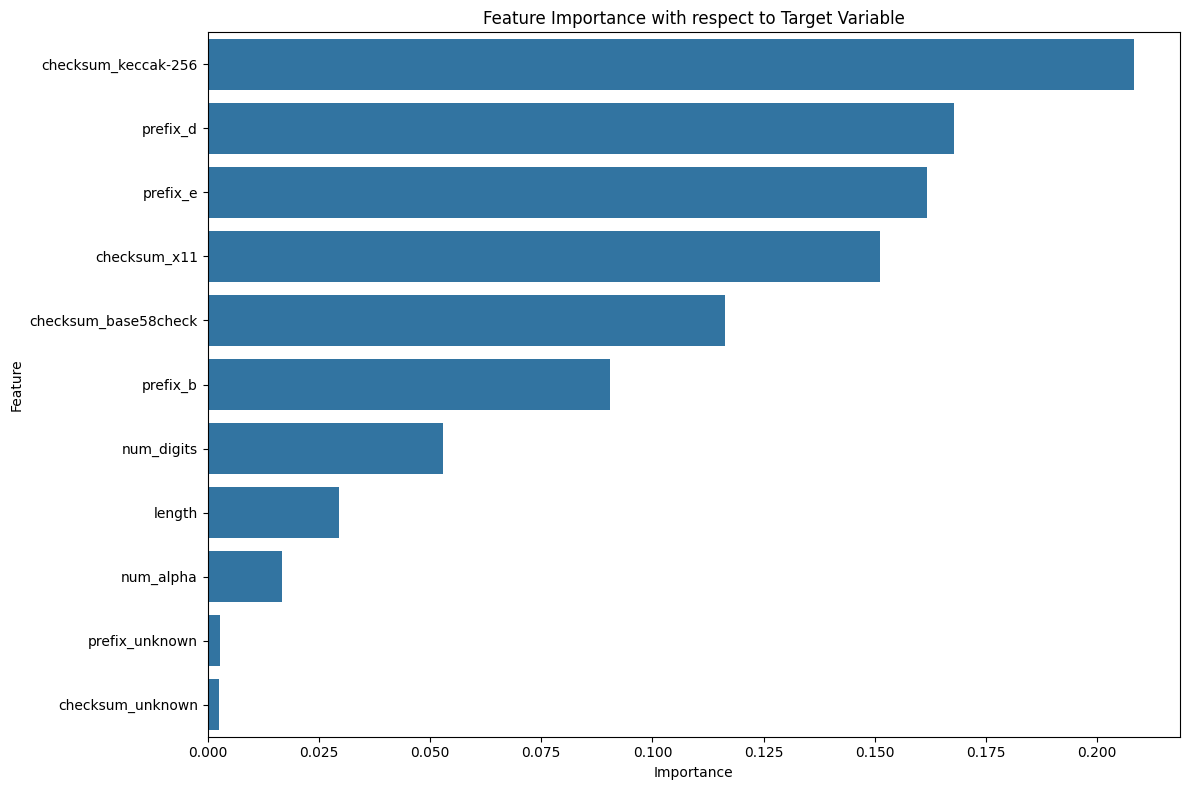

In [66]:
# check feature importance
# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = df.drop(columns=['address', 'type']).columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance with respect to Target Variable')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()